## AND GATE

In [167]:
import numpy as np

In [168]:
def activation(v):
    return 1 if v>=1 else 0

In [169]:
def perceptron_model(x,w,b):
    v=np.dot(w,x)
    y=activation(v)
    return y

In [170]:
def AND_GATE(epochs, eta):
    a = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
    expected_outputs = np.array([0, 0, 0, 1])  

    w = np.array([1.2, 0.6])  
    bias_val = 0.0

    print(f"Initial Weights: {w}, Initial Bias: {bias_val}")

    
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")
        total_error = 0

        for i in range(len(a)):
            x = a[i]  
            expected = expected_outputs[i]  

            
            y_pred = perceptron_model(x, w, bias_val)

            
            error = expected - y_pred
            total_error += abs(error)

            
            w[0] = w[0] + eta * error * x[0]  
            w[1] = w[1] + eta * error * x[1]  

            
            print(f"Input: {x}, Predicted: {y_pred}, Expected: {expected}, Error: {error}")
            print(f"Updated Weights: {w}, Bias: {bias_val}")

        if total_error == 0:
            print("\n\nTraining complete - no more errors.")
            break

    print(f"\nFinal Weights: {w}, Final Bias: {bias_val}")
    return w, bias_val

In [171]:
trained_weights, trained_bias = AND_GATE(5,0.5)

Initial Weights: [1.2 0.6], Initial Bias: 0.0

Epoch 1/5
Input: [0 0], Predicted: 0, Expected: 0, Error: 0
Updated Weights: [1.2 0.6], Bias: 0.0
Input: [0 1], Predicted: 0, Expected: 0, Error: 0
Updated Weights: [1.2 0.6], Bias: 0.0
Input: [1 0], Predicted: 1, Expected: 0, Error: -1
Updated Weights: [0.7 0.6], Bias: 0.0
Input: [1 1], Predicted: 1, Expected: 1, Error: 0
Updated Weights: [0.7 0.6], Bias: 0.0

Epoch 2/5
Input: [0 0], Predicted: 0, Expected: 0, Error: 0
Updated Weights: [0.7 0.6], Bias: 0.0
Input: [0 1], Predicted: 0, Expected: 0, Error: 0
Updated Weights: [0.7 0.6], Bias: 0.0
Input: [1 0], Predicted: 0, Expected: 0, Error: 0
Updated Weights: [0.7 0.6], Bias: 0.0
Input: [1 1], Predicted: 1, Expected: 1, Error: 0
Updated Weights: [0.7 0.6], Bias: 0.0


Training complete - no more errors.

Final Weights: [0.7 0.6], Final Bias: 0.0


In [172]:
def test_AND_gate(trained_weights, trained_bias):
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    print("\nTesting the trained AND gate:")
    
    for x in inputs:
        output = perceptron_model(x, trained_weights, trained_bias)
        print(f"Input: {x}, Output: {output}")

test_AND_gate(trained_weights, trained_bias)


Testing the trained AND gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


## OR GATE

In [173]:
import matplotlib.pyplot as plt

In [174]:
x1=[0,0,1,1]
x2=[0,1,0,1]
y=[0,1,1,1]

In [175]:
def predicted(x1,x2,w1,w2):
    s=x1*w1+x2*w2
    if s>=1:
        return 1
    else:
        return 0

In [176]:
def error(x1,x2,w1,w2,y):
    return y-predicted(x1,x2,w1,w2)

In [177]:
def lossfun(x1,x2,w1,w2,y):
    sum=0
    for i in range (len(x1)):
        sum=sum+error(x1[i],x2[i],w1,w2,y[i])
    return sum
                    

In [178]:
def training(x1,x2,y,lr):
    w1=0.2
    w2=0.2
    
    losslist=[]
    for epoch in (range(100)):
        loss=lossfun(x1,x2,w1,w2,y)
        losslist.append(loss)
        for i in range(len(x1)):
            w1=w1+lr*error(x1[i],x2[i],w1,w2,y[i]) *x1[i]
            w2=w2+lr*error(x1[i],x2[i],w1,w2,y[i]) *x2[i]
    return w1,w2,losslist

In [179]:
w1,w2,losses=training(x1,x2,y,lr=0.01)

In [180]:
print(w1,w2)

1.0000000000000007 1.0000000000000007


In [181]:
print(losses)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [182]:
print(predicted(0,0,w1,w2))

0


In [183]:
print(predicted(0,1,w1,w2))

1


In [184]:
epochs=[x for x in range(len(losses))]

<function matplotlib.pyplot.show(close=None, block=None)>

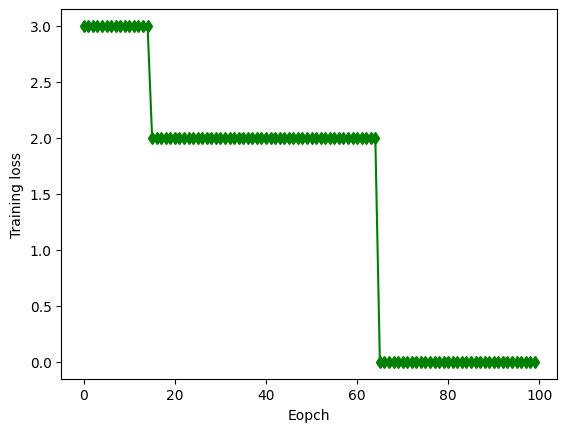

In [195]:
plt.plot(epochs,losses,color='g', marker='d')
plt.xlabel('Eopch')
plt.ylabel('Training loss')
plt.show

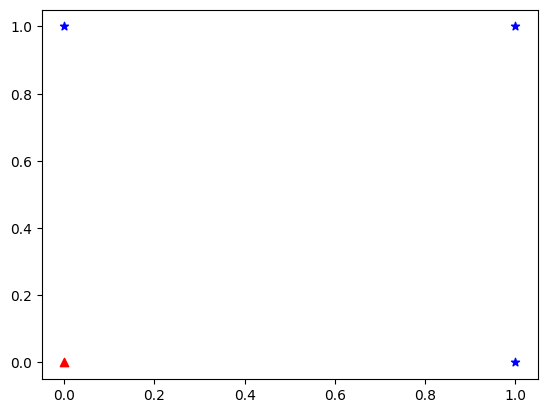

In [196]:
plt.scatter(x1[0],x2[0],color='r',marker='^')
plt.scatter(x1[1:],x2[1:],color='b',marker='*')
plt.show()

In [197]:
def lineplots(x1,w1,w2,th):
    x2=[]
    for i in range(len(x1)):
        x2.append((0.5-x1[i]*w1)/w2)
    return x2

In [198]:
x2pred=lineplots(x1,w1,w2,0.5)

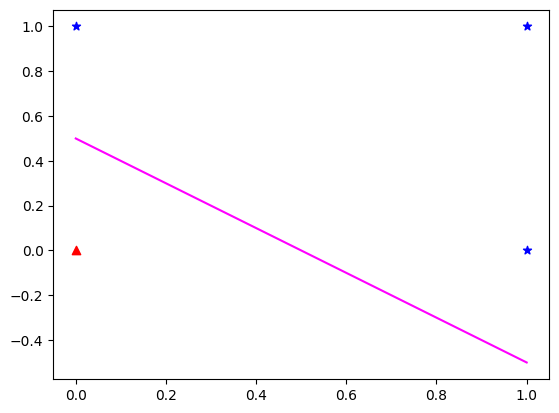

In [199]:
plt.scatter(x1[0],x2[0],color='r',marker='^')
plt.scatter(x1[1:],x2[1:],color='b',marker='*')
plt.plot(x1,x2pred,color='magenta')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

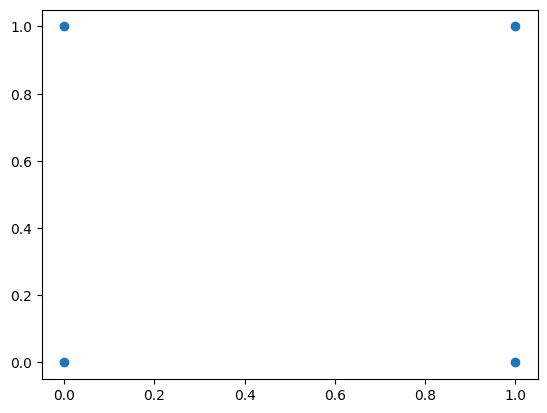

In [187]:
plt.scatter(x1,x2)
plt.show

## Perceptron learning on dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [40]:
df = pd.read_csv('D:\PG SEM-III\Data Science_practical2023\DATASET\diabetes.csv')
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\karmo\AppData\Local\Temp\ipykernel_6288\2323632834.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\PG SEM-III\Data Science_practical2023\DATASET\diabetes.csv')


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [43]:
a = np.array(df['Pregnancies'])
b = np.array(df['Glucose'])
c = np.array(df['BloodPressure'])
d = np.array(df['SkinThickness'])
e = np.array(df['Insulin'])
f = np.array(df['BMI'])
g = np.array(df['DiabetesPedigreeFunction'])
h = np.array(df['Age'])

y = np.array(df['Outcome'])

In [44]:
def weight_cal(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8):
    return float(w1*a + w2*b + w3*c + w4*d + w5*e + w6*f + w7*g + w8*h)

In [45]:
def activationFunction(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8):
    if weight_cal(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8) >= 0.5:
        return 1
    else:
        return 0

In [46]:
def errorFunction(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8,y):
    return (y - activationFunction(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8))


In [47]:
def lossFunction(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8,y):
    err = 0
    for i in range(len(y)):
        err += (errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))
    return err

In [50]:
def perceptronTraing(a,b,c,d,e,f,g,h,y):
    w1 = 0.4
    w2 = 0.6
    w3 = 0.3
    w4 = 0.7
    w5 = 0.1
    w6 = 0.8
    w7 = 0.7
    w8 = 0.5
    epoch = 0
    lemda = 0.001

    epochs_list = []
    loss_list = []

    while (True):
        for i in range(len(y)):
            w1 += lemda*(errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))*a[i]
            w2 += lemda*(errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))*b[i]
            
            w3 += lemda*(errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))*c[i]
            w4 += lemda*(errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))*d[i]
            
            w5 += lemda*(errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))*e[i]
            w6 += lemda*(errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))*f[i]
            
            w7 += lemda*(errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))*g[i]
            w8 += lemda*(errorFunction(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i]))*h[i]
            
        epoch += 1
        epochs_list.append(epoch)
        loss_list.append(lossFunction(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8,y))
       
        if(lossFunction(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8,y) == 0 or epoch == 1000):
            print('After '+str(epoch)+'th Epoch')
            print('w1 =  '+str(w1))
            print('w2 =  '+str(w2))
            
            print('w3 =  '+str(w3))
            print('w4 =  '+str(w4))
            
            print('w5 =  '+str(w5))
            print('w6 =  '+str(w6))
            
            print('w7 =  '+str(w7))
            print('w8 =  '+str(w8))

            print('Loss := ',lossFunction(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8,y))
            break

    return w1,w2,w3,w4,w5,w6,w7,w8,loss_list,epochs_list
    

In [51]:
w1,w2,w3,w4,w5,w6,w7,w8,loss_list,epochs_list = perceptronTraing(a,b,c,d,e,f,g,h,y)

After 387th Epoch
w1 =  1.271000000000192
w2 =  0.11600000000005198
w3 =  -0.23699999999996274
w4 =  0.11400000000000238
w5 =  0.005999999999986225
w6 =  0.04899999999999731
w7 =  0.6774459999999943
w8 =  -0.2550000000000807
Loss :=  0


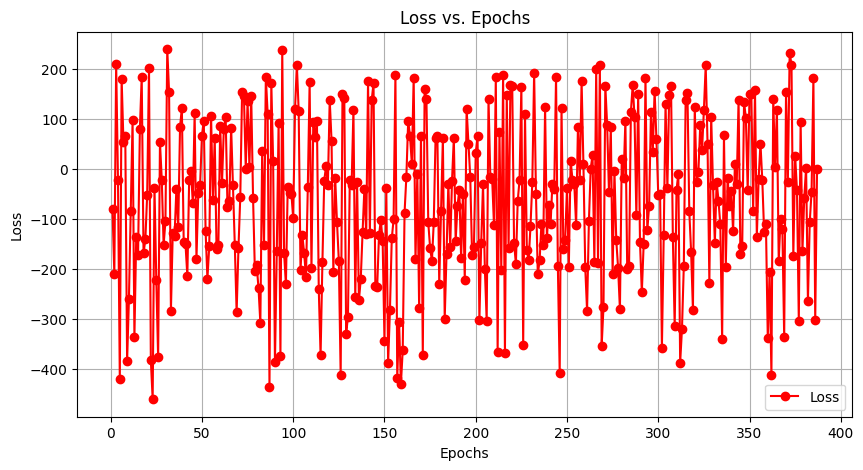

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_list, marker='o', color='r', label='Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [53]:
def prediction(a,b,c,d,e,f,g,h):
    if (activationFunction(a,b,c,d,e,f,g,h,w1,w2,w3,w4,w5,w6,w7,w8) == 0):
        print('Lebel 0:- Not Diabetes')
    else:
        print('Lebel 1:- Diabetes')

In [54]:
df.head(15)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1

In [55]:
prediction(10,115,0,0,0,35.3,0.134,29)

Lebel 1:- Diabetes


In [56]:
prediction(8,183,64,0,0,23.3,0.672,32)

Lebel 1:- Diabetes


In [57]:
prediction(10,139,80,0,0,27.1,1.441,57)

Lebel 0:- Not Diabetes
